<strong> Bengaluru House Price Prediction </strong>

<b> Data: </b>

The train and test data will consist of various features that describe that property in Bengaluru. This is an actual data set that is curated over months of primary & secondary research by our team. Each row contains fixed size object of features. There are 9 features and each feature can be accessed by its name.

<b>Features:</b>

- Area_type – describes the area
- Availability – when it can be possessed or when it is ready(categorical and time-series)
- Location – where it is located in Bengaluru
- Price – Value of the property in lakhs(INR)
- Size – in BHK or Bedroom (1-10 or more)
- Society – to which society it belongs
- Total_sqft – size of the property in sq.ft
- Bath – No. of bathrooms
- Balcony – No. of the balcony

<b>Problem Statement:</b>

With the given 9 features(categorical and continuous) build a model to predict the price of houses in Bengaluru.

# Imports - DAY 1

In [1]:
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns
import math

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

## Discussion
- RapidMiner Interface
- Operators and Processes, Data Load Type
## Hands On
- Load  train and test dataframes 
- Merge the 2 datasets into 1 and create a new column to specify the source of the data, name the column as "data_category"
    - Use Values under "data_category" - "train" and "test" respectively
        
- Remove "s_no" column from the dataset, it has no use

# Data Loads

In [2]:
train_data=pd.read_csv(r"..\data\raw\train_data.csv") #Load train and test data in RapidMiner - Load it in repository
test_data=pd.read_csv(r"..\data\raw\test_data.csv")

In [3]:
train_data.head()

,s_no,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,1,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,2,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,3,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,4,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,5,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
train_data.shape
test_data.shape

(13320, 10)

(1480, 10)

## Adding Train and Test Data

To apply the same set of data cleaning operations on Train and Test dataset, concatenating them both. Adding a column 'data_category' in both datasets with values 'train' and 'test' respectively. Later, we can separate the dataset based on these values easily. Please note that any data which needs to be removed (such as outlier) will only be removed from training set.

In [5]:
# Generate a column in each dataset named - "data_category" and fill values as "train" and "test" respectively
train_data['data_category'] = 'train' 
test_data['data_category'] = 'test'

In [6]:
df = pd.concat([train_data,test_data], ignore_index=True) # Concatenate the train and test data
df.drop(['s_no'], axis=1, inplace=True) # drop this column, it is not required

In [7]:
df.shape
df.tail()

(14800, 10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,data_category
14795,Super built-up Area,Ready To Move,Vittasandra,2 BHK,Prlla C,1246,2.0,1.0,NaN,test
14796,Super built-up Area,Ready To Move,Gottigere,3 BHK,NaN,1660,3.0,2.0,NaN,test
14797,Super built-up Area,Ready To Move,Channasandra,2 BHK,Unm 2El,1216,2.0,2.0,NaN,test
14798,Built-up Area,18-Feb,Tumkur Road,2 BHK,Sahtsva,996,2.0,1.0,NaN,test
14799,Built-up Area,Ready To Move,7th Phase JP Nagar,2 BHK,MaicaRS,1150,2.0,2.0,NaN,test


# EDA

## Checking Null Values

In [8]:
df.isnull().sum() #Check the Null Values for each column

area_type           0
availability        0
location            1
size               18
society          6128
total_sqft          0
bath               80
balcony           678
price            1480
data_category       0
dtype: int64

<Figure size 1152x504 with 0 Axes>

<AxesSubplot:xlabel='price', ylabel='area_type'>

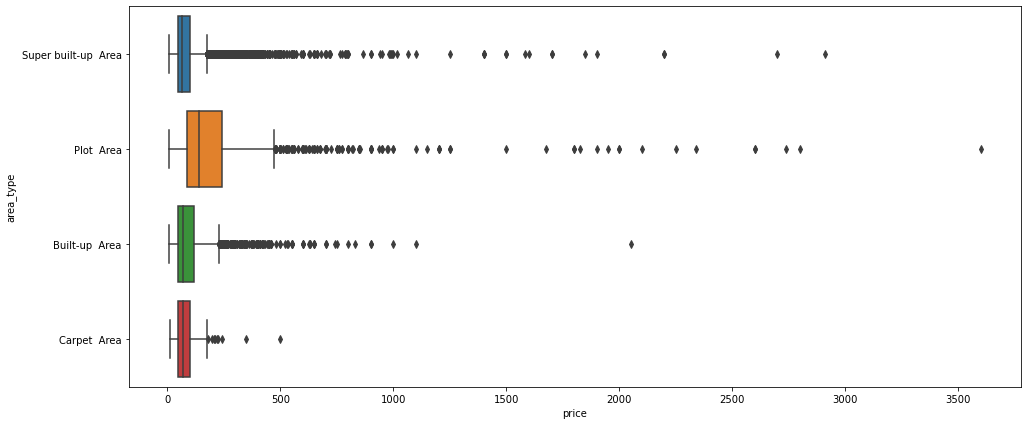

In [9]:
# Create a box plot between Area Type and Price

plt.figure(figsize=(16,7))
sns.boxplot(x=train_data['price'],y=train_data['area_type'])

As per the analysis, the median cost for 'Plot Area' house type is the highest among other categories.

In [10]:
df.dtypes

area_type         object
availability      object
location          object
size              object
society           object
total_sqft        object
bath             float64
balcony          float64
price            float64
data_category     object
dtype: object

We can see that the two main columns 'size' and 'total_sqft' are objects instead of numeric. Hence, we cannot go further with EDA till we clean these columns. Let's do the cleaning and data exploration simultaneously. 

## Checking unique and number of unique values present in each categorical variable

In [11]:
# Analyse the same in RapidMiner, how can we see these insights?

for i in df.columns:
    if df[i].dtype == 'O':
        print('\nNumber of unique values in {} category: '.format(i), df[i].nunique())
        print('Unique data in {} category:\n'.format(i), df[i].unique())


Number of unique values in area_type category:  4
Unique data in area_type category:
 ['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']

Number of unique values in availability category:  82
Unique data in availability category:
 ['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '20-Feb' '18-Apr' '20-Aug' '18-Oct'
 '19-Mar' '17-Sep' '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan'
 '18-Aug' '19-Jan' '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep'
 '17-May' '17-Jun' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun'
 '22-Jun' '19-Jul' '21-Feb' 'Immediate Possession' '19-May' '17-Nov'
 '20-Oct' '20-Jun' '19-Feb' '21-Oct' '21-Jan' '17-Mar' '17-Apr' '22-May'
 '19-Oct' '21-Jul' '21-Nov' '21-Mar' '16-Dec' '22-Mar' '20-Jan' '21-Sep'
 '21-Aug' '14-Nov' '19-Nov' '15-Nov' '16-Jul' '15-Jun' '17-Feb' '20-Nov'
 '20-Jul' '16-Sep' '15-Oct' '15-Dec' '16-Oct' '22-Nov' '15-Aug' '17-Jan'
 '16-Nov' '20-Apr' '16-Ja

# Data Cleaning and Feature Engineering

## Size - Number of Bedrooms

In [12]:
df['size'].value_counts().head()

2 BHK        5739
3 BHK        4788
4 Bedroom     918
4 BHK         673
3 Bedroom     613
Name: size, dtype: int64

Since, number of bedrooms should be a continuos variable, we'll only extract the numeric value from this series of string values.

In [13]:
# Remove String part from the columns and retain only the numeric value of the column and 
# then convert this column into float/int

df['size'] = df['size'].apply(lambda x: x.split(' ')[0] if isinstance(x,str) else np.nan)
df['size'] = df['size'].astype(float)

In [14]:
# Check whether the column has any missing values
df['size'].isnull().sum()

18

## Location

In [15]:
df['location'].value_counts()

Whitefield                     591
Sarjapur  Road                 437
Electronic City                337
Kanakpura Road                 298
Thanisandra                    277
                              ... 
yelahanka, north                 1
BEL Layout                       1
Jaraganahalli Jp Nagar Post      1
Kurudusonnenahalli               1
Gopal Reddy Layout               1
Name: location, Length: 1358, dtype: int64

We can see that, there are 1358 unique locations in this dataset. Looking closely at the dataset, most of these locations are repeated but with a slight change in name. Further, these locations may belong to the same area. Hence to clean this column, we are going group areas belonging to same pincodes together. To find the common pincodes for each of these locations we'll build a Web Scraper.

### Searching Location Pincode through Selenium Webdriver

In [ ]:
import os
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException, WebDriverException
import requests

# get the path of ChromeDriverServer
dir = os.path.dirname(r"C:\Users\Devesh Singh\Python Scripts\Machine Hack\chromedriver.exe")
chrome_driver_path = dir + "\chromedriver.exe"

uniq_test = uniq_locn.copy(deep=True)

final_list=pd.DataFrame({'Place':[],
                         'Pin Code':[],
                         'Taluk':[],
                         'Division':[],
                         'District':[],
                         'State':[],
                        'Uniq':[]})

count=0
m=0
# create a new Chrome session
driver = webdriver.Chrome(chrome_driver_path)
driver.implicitly_wait(5)
driver.maximize_window()

for i in range(len(uniq_test)):
    
    # Navigate to the application home page
    driver.get("http://www.bing.com/")
    
    # get the search textbox
    #search_field = driver.find_element_by_name("q")    #worked, for Google.com only
    search_field = driver.find_element_by_id("sb_form_q")    #worked, for Bing Search
    
    # enter search keyword and submit
    search_field.send_keys(uniq_test.iloc[i,0])
    search_field.submit()
    
    try:
        #clicking the first link
        #driver.find_element(By.XPATH, '(//h3)[1]/a').click()    #worked, for Google.com only
        driver.find_element_by_partial_link_text("PIN CODE").click()   #worked, for Bing Search

        #waiting for link to open fully
        driver.implicitly_wait(5)

        #copying the url of the browser
        url = driver.current_url

        html = requests.get(url).content
        df_list = pd.read_html(html)


        df = df_list[-1]
        df2=pd.DataFrame(df.iloc[1,:])
        df3=pd.DataFrame.transpose(df2).reset_index(drop=True)
        value=pd.DataFrame({'Place':[df3.iloc[0,0]],
                            'Pin Code':[df3.iloc[0,1]],
                            'Taluk':[df3.iloc[0,2]],
                            'Division':[df3.iloc[0,3]],
                            'District':[df3.iloc[0,4]],
                            'State':[df3.iloc[0,5]],
                            'Uniq':[uniq_test.iloc[i,0]]})

        final_list=final_list.append(value, ignore_index=True)
        m+=1
        print(m,"  ",uniq_test.iloc[i,0])
    
    except (NoSuchElementException, WebDriverException) as e:
        count += 1
        pass
    driver.delete_all_cookies()
    
driver.close()

### Pincode File

Reading the dataframe of scraped pincodes.

In [16]:
# Downloaded list of pincodes
location_df = pd.read_excel(r'..\data\\additional_data\location_pincodes.xlsx')

In [17]:
location_df["browser_link"] = location_df["browser_link"].apply(lambda x: x.replace(" Bangalore site:codepin.in",""))

Mapping this list with original dataframe.

In [18]:
df['location'] = df['location'].map(dict(zip(location_df['browser_link'],location_df['pincode'])))

In [19]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,data_category
0,Super built-up Area,19-Dec,560100.0,2.0,Coomee,1056,2.0,1.0,39.07,train
1,Plot Area,Ready To Move,561203.0,4.0,Theanmp,2600,5.0,3.0,120.00,train
2,Built-up Area,Ready To Move,560061.0,3.0,NaN,1440,2.0,3.0,62.00,train
3,Super built-up Area,Ready To Move,560091.0,3.0,Soiewre,1521,3.0,1.0,95.00,train
4,Super built-up Area,Ready To Move,560077.0,2.0,NaN,1200,2.0,1.0,51.00,train


In [20]:
df['location'].value_counts().head()

560100.0    914
560066.0    896
560077.0    631
560078.0    618
562125.0    484
Name: location, dtype: int64

In [21]:
df['location'].isnull().sum()

1

In [22]:
df[df["location"].isnull()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,data_category
568,Super built-up Area,Ready To Move,NaN,3.0,Grare S,1600,3.0,2.0,86.0,train


By grouping locations through pincodes we have reduced 1358 locations to 128 locations.

## Total Square Feet - DAY 2

In [ ]:
df['total_sqft'].unique()

Since, there are multiple string values in this column, we are going to extract these string values and clean them. Since, this process is going to be of multiple step, we'll take only 'total_sqft' column into another dataframe.

In [ ]:
sqft = df[['total_sqft']]

In [ ]:
sqft.dtypes

### Extracting Only Float Val or Only String Val

Function to extract only float value, other values will be replaced as NaNs.

In [ ]:
def float_val(x):
    try:
        x = float(x)
    except:
        x = np.nan
    return x

Function to extract only string value, other values will be replaced as NaNs.

In [ ]:
def string_val(x):
    try:
        x = float(x)
        if isinstance(x,float):
            x = np.nan
    except:
        pass    
    return x

In [ ]:
sqft['float_val'] = sqft['total_sqft'].apply(float_val)

sqft['string_val'] = sqft['total_sqft'].apply(string_val)

sqft[sqft['string_val'].notnull()].head(10)

### Processing String Vals

The errorneous string values present in the 'total_sqft' column are of two types:
- Range, e.g. 2100 - 2850, to clean this types of error, we are going to take the average of these ranges
- Values in other unit, e.g. 34.46Sq. Meter, to clean this, we are going to extract the float and string values, convert this values in square feet.

In [ ]:
sqft_string = sqft[['total_sqft','string_val']][sqft['string_val'].notnull()]

In [ ]:
sqft_string['v_1'] = sqft_string['string_val'].apply(lambda x: x.split("-")[0])
sqft_string['v_2'] = sqft_string['string_val'].apply(lambda x: x.split("-")[-1])

In [ ]:
def average_val(v_1, v_2):
    try:
        v_1 = float(v_1)
        v_2 = float(v_2)
        avg = (v_1 + v_2)/2
    except:
        avg = v_1
    return avg

In [ ]:
sqft_string['avg_val'] = sqft_string.apply(lambda x: average_val(x.v_1,x.v_2),axis=1 )
sqft_string.head()

In [ ]:
sqft_string['conversion'] = sqft_string['avg_val'].apply(string_val)

sqft_string.head(10)

### Extracting Conversion Units with 'Re'

In [ ]:
import re
sqft_string['con_val'] = sqft_string['conversion'].apply(lambda x: "".join(re.findall(r"[a-zA-Z_]", str(x))))

sqft_string['num_val'] = sqft_string['conversion'].apply(lambda x: ".".join(re.findall("\d+", str(x))))

In [ ]:
sqft_string.head(13)

In [ ]:
sqft_string['num_val'] = sqft_string['num_val'].replace('', np.nan).fillna(0).astype(float)

In [ ]:
sqft_string['num_val'] = np.where(sqft_string['num_val'] == 0,
                                  sqft_string['avg_val'],
                                  sqft_string['num_val'])

In [ ]:
sqft_string.head(14)

### Loading Conversion Factor

In [ ]:
# The list of conversion factor
conversion_factor = pd.read_csv(r"..\data\additional_data\conversion_factor.csv")

In [ ]:
conversion_factor

Mapping the conversion factor and filling remaining values with 1.

In [ ]:
sqft_string['conversion_factor'] = (sqft_string['con_val']
                                           .map(dict(zip(conversion_factor['unit']
                                                         ,conversion_factor['conversion_factor']))).fillna(1))

In [ ]:
sqft_string['after_conversion'] = sqft_string['num_val']*sqft_string['conversion_factor']

sqft_string['after_conversion'] = sqft_string['after_conversion'].apply(lambda x: round(x, 2))

sqft_string.head(10)

In [ ]:
string_val_dict = dict(zip(sqft_string['total_sqft'],sqft_string['after_conversion']))

### Mapping Converted Rates with Original DF

In [ ]:
df['total_sqft_new'] = df['total_sqft'].map(string_val_dict)

In [ ]:
df['total_sqft'] = (df.apply(lambda row: row['total_sqft'] 
                             if np.isnan(row['total_sqft_new']) 
                             else row['total_sqft_new'],axis=1))

In [ ]:
df['total_sqft'] = df['total_sqft'].astype(float)

df.drop(['total_sqft_new'], axis=1, inplace=True)

In [ ]:
df['total_sqft'].isnull().sum()

## Society

In [ ]:
df['society'].isnull().sum()

In [ ]:
df[df['society'].isnull()].head()

Here, just making a binary classification whether the House is in a Society or not, filling NaNs with zero and remaining with 1.

In [ ]:
df.loc[(df['society'].isnull()), 'society']= 0

df.loc[(df['society']!=0),'society'] = 1

df['society'].value_counts()

## Availability

In [ ]:
df['availability'].value_counts().head()

In 'availability' column, we can broadly categorised the data into two ways:
- "Ready To Move" or "Immediate Possession"
- A future date

Since, the year is not mentioned in these dates, hence we cannot utilise this column further.
Therefore, categorising the data points as '1' for "Ready To Move" or "Immediate Possession" and 
'0' for the dates.

In [ ]:
df['availability'].replace(["Ready To Move","Immediate Possession"], 1, inplace=True)

df.loc[(df['availability']!=1),'availability'] = 0

df['availability'].value_counts()

# Imputation - DAY 3

In [ ]:
df.isnull().sum()

## Size

In [ ]:
df[df['size'].isna()].head()

To impute variable 'size' i.e. number of bedrooms, the variable 'total_sqft' is used. The 'total_sqft' is divided by 550(considering a generic factor per room in a house with hall and kitchen), and the roundup till the next integer.

In [ ]:
df['size'] = df['size'].astype(float)

In [ ]:
df['size'] = df.apply(lambda row: math.ceil(float(row['total_sqft']/550)) if np.isnan(row['size']) else row['size'], axis=1)

In [ ]:
df[df['size'].isna()]

## Bath

In [ ]:
df[df['bath'].isna()].head()

In [ ]:
df[['size','bath']].corr()

As we can see that number of bedrooms and bathrooms are highly correlated, we will fill the NaNs in variable 'bath' with values of variable 'size'.

In [ ]:
df['bath'] = df.apply(lambda row: row['size'] if np.isnan(row['bath']) else row['bath'], axis=1)

## Balcony

In [ ]:
df.groupby(['size']).agg({'balcony':['count','mean','median']})

Looking at the mean and median of number of balconies grouped by number of bedrooms. We can infer, in general, that 2 or less than 2 bedrooms house has 1 balcony,  3 to 9 bedrooms house has 2 balconies, more than 9 bedrooms house has 3 or more balconies. We can impute these values with median, and for rooms where median is not available(16 to 19 rooms), filling NaNs with 4.

In [ ]:
balcony = df.groupby(['size']).agg({'balcony':'median'}).reset_index()

balcony['balcony'].fillna(4, inplace=True)

balcony_dict = dict(zip(balcony['size'], balcony['balcony']))

df['new_balcony'] = df[df['balcony'].isna()]['size'].map(balcony_dict)

In [ ]:
df['balcony'] = (df.apply(lambda row: row['new_balcony'] 
                          if np.isnan(row['balcony']) 
                          else row['balcony'], axis=1))

In [ ]:
df.drop(['new_balcony'], axis=1, inplace=True)

In [ ]:
df['balcony'].isnull().sum()

# Outlier Removal

Checking the outliers in the training dataset and removing them from it. Removing outliers from 'total_sqft' first so it doesn't create any skewness in next step deriving any new feature.

For this operation, splitting the data based on train and test and joining it back later.

In [ ]:
train_df = df[df['data_category']=='train']
test_df = df[df['data_category']=='test']

In [ ]:
plt.figure(figsize=(30,10))
sns.boxplot(train_df['total_sqft'])
plt.show()

We can see that there are some outliers which are exobitant, hence we need to remove them. Setting a lower and upper limit to remove these outliers.

In [ ]:
lower_limit = np.nanpercentile(train_df['total_sqft'],0.25)
upper_limit = np.nanpercentile(train_df['total_sqft'],99.75)
print(lower_limit)
print(upper_limit)

In [ ]:
len(train_df)

In [ ]:
train_df = train_df[train_df['total_sqft'].between(lower_limit, upper_limit)]

In [ ]:
len(train_df)

So, we have removed 64 data points from training dataset.

In [ ]:
df = pd.concat([train_df,test_df])

# Deriving New Feature

Pincodes, a categorical variable, with 128 distinct values will increase the number of columns with one-hot encoding. This will also increase the overall computational time for training the model. To solve this issue, we can optimise the model with a new numeric feature derived from 'location', 'area_type','society' and drop 'location' from the dataset later.

This new feature will be derived from 'Training Data' only and will be common for both training and test data.

## Price Per Location - Combining Location, Society and Area Type

In [ ]:
price_per_loc = (df[df['data_category']=='train'].groupby(['area_type','location','society'])
                 .agg({'total_sqft': 'sum','price':'sum'}).reset_index())

price_per_loc['avg_price_per_loc'] = price_per_loc['price']/price_per_loc['total_sqft']

In [ ]:
price_per_loc.head()

Merging this new column with original 'df'.

In [ ]:
df = pd.merge(df,price_per_loc[['area_type','location', 'society','avg_price_per_loc']],
                  on=['area_type','location', 'society'], how='left')

In [ ]:
df['avg_price_per_loc'].isnull().sum()

## Price Per Location 2 - Combining Location and Society Only 

Since, there are 13 values in Test Data that not available to merge, we can create another variable 'avg_price_per_loc_2' from 'location' and 'society' only to fill NaNs.

In [ ]:
price_per_loc_2 = (df[df['data_category']=='train'].groupby(['location','society'])
                   .agg({'total_sqft': 'sum','price':'sum'}).reset_index())

price_per_loc_2['avg_price_per_loc_2'] = price_per_loc_2['price']/price_per_loc_2['total_sqft']

In [ ]:
price_per_loc_2.head()

In [ ]:
df = pd.merge(df,price_per_loc_2[['location', 'society','avg_price_per_loc_2']],
                  on=['location', 'society'], how='left')

In [ ]:
df['avg_price_per_loc'] = df.apply(lambda row: row['avg_price_per_loc_2'] if np.isnan(row['avg_price_per_loc']) else row['avg_price_per_loc'], axis=1)

In [ ]:
df['avg_price_per_loc'].isnull().sum()

## Price Per Location 3 - Average Price per SqFt for remaining null values

There are still three values we need to fill.

In [ ]:
average_price = df[df['data_category']=='train']['price'].sum()/df[df['data_category']=='train']['total_sqft'].sum()

In [ ]:
df['avg_price_per_loc'].fillna(average_price, inplace=True)

In [ ]:
plt.figure(figsize=(30,10))
df['avg_price_per_loc'].hist(bins=200)
plt.show()

In [ ]:
df.drop(['location','avg_price_per_loc_2'],axis=1, inplace=True)

In [ ]:
df.head(5)

Finally we have got a new feature which is created from variable 'location'.

# Checking the Distribution - DAY 4

## Specifying data type to each variable

In [ ]:
df['area_type'] = pd.Categorical(df['area_type'])
df[['size','total_sqft','bath','balcony','avg_price_per_loc','price']] = df[['size','total_sqft','bath','balcony','avg_price_per_loc','price']].apply(pd.to_numeric)

df[['availability','society']]  = df[['availability','society']].astype(int)

In [ ]:
df = df[['area_type', 'availability', 'size', 'society', 'total_sqft', 'bath',
       'balcony', 'avg_price_per_loc', 'price', 'data_category']]

In [ ]:
df.head()

## Total Sqft

In [ ]:
plt.figure(figsize=(30,10))
df['total_sqft'].hist(bins=200)
plt.show()

The distribution is right skewed. Let's see if taking logrithmic value can remove this skewness.

In [ ]:
plt.figure(figsize=(30,10))
np.log(df['total_sqft']).hist(bins=200)
plt.show()

Perfect. The skewness has decreased significantly with logrithmic conversion.

In [ ]:
df['total_sqft'] = np.log(df['total_sqft'])

## Price

Splitting the data to check for 'price' variable distribution.

In [ ]:
train_df = df[df['data_category']=='train']
train_df.drop(['data_category'], axis=1, inplace=True)
len(train_df)

In [ ]:
test_df = df[df['data_category']=='test']
test_df.drop(['data_category'], axis=1, inplace=True)
len(test_df)

In [ ]:
plt.figure(figsize=(30,10))
(train_df['price']).hist(bins=200)
plt.show()

Here also, the distribution is right skewed.

In [ ]:
plt.figure(figsize=(30,10))
np.log(train_df['price']).hist(bins=200)
plt.show()

In [ ]:
train_df['price'] = np.log(train_df['price'])

In [ ]:
train_df.dtypes

# One-Hot Encoding

In [ ]:
main_train = pd.get_dummies(train_df)
main_test = pd.get_dummies(test_df)

In [ ]:
main_train.head(3)

main_test.head(3)

Saving file post-processing.

In [ ]:
main_train.to_csv('../data/processed/train_df.csv', index=False)
main_test.to_csv('../data/processed/test_df.csv', index=False)

# Modeling

## Import Models

In [ ]:
# Accuracy and Cross-Validation scores.
#Import models from scikit learn module:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score   #For K-fold cross validation
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets, linear_model, metrics
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, make_scorer
from math import sqrt
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#read it back
main_train=pd.read_csv("../data/processed/train_df.csv")
main_test=pd.read_csv("../data/processed/test_df.csv")

In [ ]:
X = main_train.drop('price', axis=1)
Y = main_train['price']

## Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

## Creating Custom Metric Function

In [ ]:
#Generic function for making a classification model and accessing performance:
## How to create your own metric function and make it as a scorer object

def mean_sq_error(y,y_pred):
    return sqrt(mean_squared_error(y,y_pred=y_pred))

rmse = make_scorer(mean_sq_error)


def regression_model(model, data, predictors, outcome):
    scores = cross_val_score(model, data[predictors],data[outcome],cv=5,scoring=rmse)
    for i in range(len(scores)):
        print("CV %s"%i + " Score:%s"%"{0:.5}".format(scores[i]) )
        
    print ("Average RMSE Cross-Validation Score : %s" % "{0:.3}".format(np.mean(scores)))

## Fitting Models

In [ ]:
all_variable=list(main_train)
all_variable.remove('price')

### Decision Tree

In [ ]:
# DecisionTreeRegressor
outcome_var = 'price'
model = DecisionTreeRegressor()
predictor_var = all_variable
regression_model(model, main_train, predictor_var, outcome_var)

### Random Forest

In [ ]:
# Random Forest Regression
outcome_var = 'price'
model = RandomForestRegressor(n_estimators=200, random_state=0, n_jobs = -1)
predictor_var = all_variable
regression_model(model, main_train, predictor_var, outcome_var)

### XGBoost

In [ ]:
# XGBoost Regressor
outcome_var = 'price'
model = XGBRegressor(n_estimators=540,random_state=0,n_jobs=-1)
predictor_var = all_variable
regression_model(model, main_train, predictor_var, outcome_var)

We can see that all the ensemble models are giving similar cross validation score of ~0.29 without much hyper parameter tuning.

# Final Results

Analyzing the results above, almost all models are giving similar rmse. We find that Random Forest model is performing best with least rmse of 0.292. So, we'll select the parameters of that model to train the final model to predict the test dataset.

In [ ]:
RF = RandomForestRegressor(bootstrap=True,
                           criterion='mse',
                           max_depth=27,
                           max_features='sqrt',
                           max_leaf_nodes=None,
                           min_impurity_decrease=0.0,
                           min_impurity_split=None,
                           min_samples_leaf=1,
                           min_samples_split=5,
                           min_weight_fraction_leaf=0.0,
                           n_estimators=260,
                           n_jobs=1,
                           oob_score=False,
                           random_state=None,
                           verbose=0,
                           warm_start=False)

In [ ]:
X_train = main_train.drop('price', axis=1)
y_train = main_train['price']

X_test = main_test.drop('price', axis=1)

In [ ]:
RF.fit(X_train, y_train)

In [ ]:
final_predictions = RF.predict(X_test)

In [ ]:
pred_df = pd.DataFrame({'log_price': final_predictions})

pred_df['price'] = pred_df['log_price'].apply(lambda x: 2.71828**x)

pred_df.head()

-----------------------------------------------------End-----------------------------------------------------